# K-Nearest Neighbor
The K-Nearest Neighbors classifier (KNN) is one of the simplest yet most commonlyused  classifiers  in  supervised  machine  learning.  KNN  is  often  considered  a  lazylearner; it doesn’t technically train a model to make predictions. Instead an observa‐tion is predicted to be the class of that of the largest proportion of the k nearest obser‐vations.  For  example,  if  an  observation  with  an  unknown  class  is  surrounded  by  anobservation of class 1, then the observation is classified as class 1.

## How do we measure distance?
<img src="Images/knn.png">
where xi  and yi  are  the  two  observations  we  are  calculating  the  distance  between. Minkowski includes a hyperparameter, p, where p = 1 is Manhattan distance and p =2 is Euclidean distance, and so on. By default in scikit-learn p = 2.

In [85]:
from sklearn.datasets import load_wine, load_iris
x = load_iris()['data']
y = load_iris()['target']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [87]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
pred = model.predict(x_test)

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [90]:
confusion_matrix(y_test,pred)

array([[17,  0,  0],
       [ 0, 10,  3],
       [ 0,  1,  7]], dtype=int64)

In [91]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      0.77      0.83        13
           2       0.70      0.88      0.78         8

    accuracy                           0.89        38
   macro avg       0.87      0.88      0.87        38
weighted avg       0.91      0.89      0.90        38



KNeighborsClassifier  contains  a  number  of  important  parameters  to  consider.First, metric  sets  the  distance  metric  used.  Second,n_jobs determines how many of the computer’s cores to use. Because making a pre‐diction requires calculating the distance from a point to every single point in the data,using multiple cores is highly recommended. Third, algorithm sets the method usedto calculate the nearest neighbors. While there are real differences in the algorithms,by  default KNeighborsClassifier  attempts  to  auto-select  the  best  algorithm  so  youoften don’t need to worry about this parameter. Fourth, by default KNeighborsClassifier works how we described previously, with each observation in the neighborhoodgetting  one  vote;  however,  if  we  set  the weights  parameter  to distance,  the  closerobservations’ votes are weighted more than observations farther away. Intuitively thismake  sense,  since  more  similar  neighbors  might  tell  us  more  about  an  observation’sclass than others.

## getting the best n_neighbour value

In [95]:
from sklearn.model_selection import GridSearchCV

search_cpace = [{'n_neighbors':np.arange(0,40)}]

model = KNeighborsClassifier()

grid = GridSearchCV(estimator=model, param_grid=search_cpace)

In [96]:
grid.fit(x_train,y_train)

D:\Installed\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
D:\Installed\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
D:\Installed\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
D:\Installed\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partit

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
grid.best_params_

{'n_neighbors': 8}

In [98]:
pred = grid.predict(x_test)

In [99]:
confusion_matrix(y_test,pred)

array([[17,  0,  0],
       [ 0, 10,  3],
       [ 0,  1,  7]], dtype=int64)

In [100]:
accuracy_score(y_test,pred)

0.8947368421052632

# using our mind

In [101]:
error_rate = [] 
  
# Will take some time 
for i in range(1, 40):   
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(x_train, y_train) 
    pred_i = knn.predict(x_test) 
    error_rate.append(np.mean(pred_i != y_test)) 
  

In [102]:
np.array(error_rate).min()

0.05263157894736842

Text(0, 0.5, 'Error Rate')

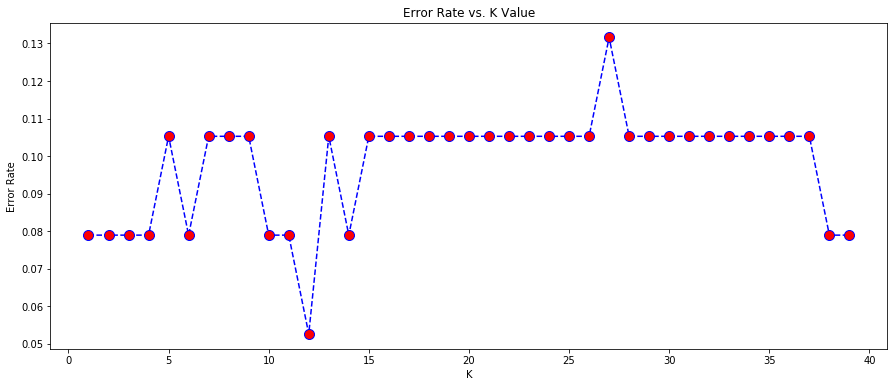

In [103]:
plt.figure(figsize =(15, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 

In [105]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1 
knn = KNeighborsClassifier(n_neighbors = 1) 

knn.fit(x_train, y_train) 
pred = knn.predict(x_test) 

print('WITH K = 1') 
print(confusion_matrix(y_test, pred)) 
print(classification_report(y_test, pred)) 

print("--------------------------------------------------------------")

# NOW WITH K = 3 
knn = KNeighborsClassifier(n_neighbors = 12) 

knn.fit(x_train, y_train) 
pred = knn.predict(x_test) 

print('WITH K = 12') 
print(confusion_matrix(y_test, pred)) 
print(classification_report(y_test, pred)) 


WITH K = 1
[[17  0  0]
 [ 0 11  2]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.85      0.88        13
           2       0.78      0.88      0.82         8

    accuracy                           0.92        38
   macro avg       0.90      0.91      0.90        38
weighted avg       0.92      0.92      0.92        38

--------------------------------------------------------------
WITH K = 12
[[17  0  0]
 [ 0 12  1]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.95        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.95      0.95      0.95        38

